# Day 7 
## Part 2 

In [1]:
import numpy as np

def get_data(filename):
    with open(filename) as f:
        return list(map(int, f.readline().split(',')))

data = get_data('input')
# data = get_data('test')
# data

In [2]:
@np.vectorize
def calc_fuel(curr_pos, to_pos):
    return(abs(curr_pos - to_pos))

In [3]:
calc_fuel(data.copy(), 2).sum()

473601

In [4]:
import pandas as pd 
df = pd.DataFrame([
    {'pos': pos, 'fuel': calc_fuel(data, pos).sum()} 
    for pos in range(sorted(data)[-1]) 
])
df.sort_values('fuel')

,pos,fuel
345,345,343605
346,346,343607
344,344,343607
347,347,343609
343,343,343609
...,...,...
1906,1906,1430457
1907,1907,1431455
1908,1908,1432453
1909,1909,1433451


<AxesSubplot:xlabel='pos'>

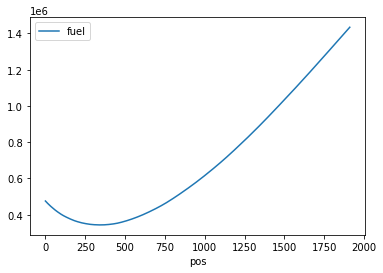

In [5]:
df.set_index('pos').plot()

## Part 2 

In [6]:
from numba import njit, prange, vectorize, int32, int64

@vectorize([int64(int64,int32)])
def calc_fuel_2(curr_pos, to_pos):
    p = curr_pos
    fuel = 0
    fuel_cost = 1
    # print("a", curr_pos, to_pos)
    heading = 1 if p < to_pos else -1
    while p != to_pos:
        fuel += fuel_cost
        fuel_cost += 1
        p += heading
    return fuel
# calc_fuel_2 = np.vectorize(calc_fuel_2, excluded=['to_pos'])
# calc_fuel_2 = vectorize(calc_fuel_2, [int32(int32, int32)])

In [7]:
d = np.array(data.copy(), dtype=np.int64)
calc_fuel_2(d, 5).sum(), calc_fuel_2(d, 2).sum()
# d

(207511209, 208928790)

In [8]:

def run():
    d = np.array(data.copy(), dtype=np.int64)
    return [
        {'pos': pos, 'fuel': calc_fuel_2(d, pos).sum()} 
        for pos in prange(sorted(d)[-1]) 
    ]

In [9]:
df = pd.DataFrame(run())
df.sort_values('fuel')

,pos,fuel
475,475,96744904
476,476,96744966
474,474,96745842
477,477,96746029
473,473,96747781
...,...,...
1906,1906,1120370306
1907,1907,1121801752
1908,1908,1123234198
1909,1909,1124667644


<AxesSubplot:xlabel='pos'>

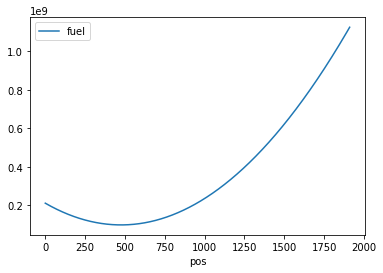

In [10]:
df.set_index('pos').plot()